In [20]:
import numpy as np
import pandas as pd
import random
import string
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from tqdm import tqdm

In [3]:
# Set the number of samples in the dataset
num_samples = 1000

# Set the number of group features and simple features
num_group_features = 100
num_simple_features = 10

# Generate random group features
group_features = pd.DataFrame()
for i in range(num_group_features):
    # Randomly determine the cardinality of the current group feature
    cardinality = random.randint(3, 10)  # Modify the range as per your requirements

    # Generate random alphabetical names for the groups
    groups = [''.join(random.choice(string.ascii_uppercase) for _ in range(3)) for _ in range(cardinality)]

    # Assign the groups to the current group feature
    group_features[f"Group_{i+1}"] = np.random.choice(groups, size=num_samples)

# Generate random simple features
simple_features = pd.DataFrame(np.random.rand(num_samples, num_simple_features), columns=[f"Simple_{i+1}" for i in range(num_simple_features)])

# Generate random target column for binary classification (0 or 1)
target = pd.DataFrame(np.random.randint(0, 2, size=num_samples), columns=["Target"])

# Concatenate all the features and target column into a single dataset
dataset = pd.concat([group_features, simple_features, target], axis=1)

dataset

,Group_1,Group_2,Group_3,Group_4,Group_5,Group_6,Group_7,Group_8,Group_9,Group_10,...,Simple_2,Simple_3,Simple_4,Simple_5,Simple_6,Simple_7,Simple_8,Simple_9,Simple_10,Target
0,XWP,XDH,NQA,TYX,PWM,URJ,OKV,KQP,ZYO,TVY,...,0.343399,0.037584,0.993123,0.130187,0.774056,0.652791,0.827239,0.849542,0.918531,1
1,INN,SYQ,CGR,THI,VJE,XEN,EAX,TFF,EXG,EJS,...,0.721378,0.051622,0.029457,0.193864,0.882383,0.816452,0.083228,0.918675,0.332312,1
2,VCQ,FLO,KMX,KNZ,VJE,DMZ,SEJ,ZZB,NDP,EJS,...,0.574194,0.301369,0.137912,0.487605,0.157770,0.749552,0.447707,0.426878,0.067825,0
3,CGI,FLO,SZM,ZAP,VJE,XEN,RNJ,KZS,EXG,EJS,...,0.865648,0.356366,0.678906,0.368922,0.271688,0.593293,0.205362,0.967472,0.667112,1
4,CGI,FEZ,NQA,THI,PWM,DMZ,GDR,KQP,ZYO,UEQ,...,0.624605,0.764050,0.760222,0.531396,0.967624,0.402237,0.537611,0.018159,0.927834,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RAC,SYQ,BLH,FCP,VJE,DMZ,EAX,KQP,ZYO,OVM,...,0.607647,0.763457,0.016883,0.379119,0.383572,0.504198,0.497135,0.633873,0.235273,1
996,DRJ,XDH,NQA,KNZ,RCW,DMZ,SEJ,TFF,ZYO,OVM,...,0.472998,0.128701,0.395274,0.993358,0.495112,0.353584,0.667796,0.291027,0.359143,1
997,VRO,SQD,CGR,ZAP,RCW,ZNT,SUM,KZS,EXG,TVY,...,0.888807,0.609279,0.641224,0.802928,0.472888,0.495228,0.511937,0.205561,0.654552,0
998,VRO,FLO,IMT,TYX,PWM,ITM,GDR,ZZB,EXG,EJS,...,0.323225,0.625341,0.725245,0.001274,0.504506,0.813849,0.859376,0.012828,0.078810,0


In [24]:
synthetic_01 = dataset.copy()

In [25]:
synthetic = synthetic_01.copy()

In [26]:
encoder = OrdinalEncoder()
synthetic[synthetic.columns[:100]] = encoder.fit_transform(synthetic.iloc[:,:100])

In [ ]:
from itertools import combinations
combi = list(combinations(synthetic.columns[0:100], 3))

accuracyList = []
for i, selCol in tqdm(enumerate(combi)):
    X = pd.concat([synthetic[list(selCol)], synthetic.iloc[:, -10:]], axis=1)
    X.drop('Target', axis=1, inplace=True)
    y = synthetic['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    pipeline = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    accuracyList.append((i,accuracy_score(y_test, y_pred)))

accuracyList

In [1]:
from sklearn.datasets import make_regression

In [30]:
dataset = pd.DataFrame(X_with_categorical, columns=["feature_"+str(i) for i in range(16)])

In [31]:
dataset

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,-0.437458,-0.609783,-0.134017,0.648280,-0.887492,0.419532,-0.120948,1.196631,0.014688,-0.784898,2.0,0.0,5.0,5.0,1.0,1.0
1,-0.350778,1.392456,0.672293,1.672266,-2.266052,-0.834185,-0.737380,-2.403669,-1.500477,-1.478777,5.0,1.0,5.0,1.0,4.0,0.0
2,-0.897830,1.057814,-0.589112,-0.912811,0.348342,0.344054,-0.417430,-1.186993,-0.935596,-0.177918,3.0,5.0,0.0,1.0,3.0,4.0
3,-1.106294,0.777407,0.466671,1.747363,1.135620,-0.236555,0.932192,1.205995,1.521006,-0.948917,3.0,3.0,0.0,3.0,5.0,0.0
4,1.422370,-0.677565,1.194109,0.462061,-0.597510,-0.251539,0.783391,-1.725807,-0.981166,-0.464404,4.0,2.0,1.0,5.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.837831,0.506158,-1.056031,2.068226,0.179914,1.202577,-1.397805,1.807609,-0.256945,0.307832,1.0,3.0,1.0,1.0,0.0,5.0
996,-0.229081,-0.098310,-1.803750,-0.680173,0.491446,1.475879,-1.284387,0.439486,0.331471,0.364561,0.0,0.0,1.0,4.0,3.0,1.0
997,-0.839528,-0.384489,-0.063390,-0.333461,0.759787,-2.135800,1.519952,1.103720,0.482790,1.083583,1.0,4.0,4.0,1.0,0.0,2.0
998,-0.196281,0.157761,-1.097368,1.191899,-1.532701,0.243005,0.950016,-1.390222,-1.476925,-0.739371,3.0,4.0,5.0,0.0,2.0,4.0


In [196]:
import pandas as pd
import numpy as np

np.random.seed(42)  # Set a random seed for reproducibility

n_samples = 1000  # Number of samples
feature_mean = 10.0  # Mean value for the feature column
feature_std = 2.0  # Standard deviation for the feature column
grouping_categories = [1,2,3]  # Categories for the grouping column
grouping_weights = [0.4, 0.3, 0.3]  # Weights for the grouping categories
target_intercept = 5.0  # Intercept for the target variable
target_coefficient = 2.0  # Coefficient for the feature column in the target variable
target_noise_std = 2.0  # Standard deviation of the noise added to the target variable

# Generate feature column
X_feature = np.random.normal(feature_mean, feature_std, n_samples).reshape(-1, 1)

# Generate grouping column
X_grouping = np.random.choice(grouping_categories, n_samples, p=grouping_weights).reshape(-1, 1)

# Generate target variable with noise
y = target_intercept + target_coefficient * X_feature.flatten() + np.random.normal(0, target_noise_std, n_samples)

# Create a DataFrame with the generated data
data = pd.DataFrame({ 'Feature': X_feature.flatten(), 'Grouping': X_grouping.flatten(), 'Target': y })

# Generate additional noisy columns for grouping and feature columns
noisy_columns = 3  # Number of additional noisy columns to add
for i in range(noisy_columns):
    grouping_noisy = np.random.choice(grouping_categories, n_samples, p=grouping_weights).reshape(-1, 1)
    feature_noisy = np.random.normal(feature_mean, feature_std, n_samples).reshape(-1, 1)
    data[f'Grouping_Noisy{i+1}'] = grouping_noisy.flatten()
    data[f'Feature_Noisy{i+1}'] = feature_noisy.flatten()

print(data.head())

     Feature  Grouping     Target  Grouping_Noisy1  Feature_Noisy1  \
0  10.993428         1  26.368438                1       13.840735   
1   9.723471         1  22.942630                1        7.554210   
2  11.295377         2  28.229103                2       10.142507   
3  13.046060         3  33.773020                1        7.412985   
4   9.531693         1  20.313042                1        8.608610   

   Grouping_Noisy2  Feature_Noisy2  Grouping_Noisy3  Feature_Noisy3  
0                3       10.863263                3       10.544473  
1                2       11.479351                3        9.885459  
2                3       15.143991                1       11.096134  
3                2        5.501135                3        7.321021  
4                3       11.217471                3        8.515227  


In [262]:
import pandas as pd
import numpy as np

np.random.seed(42)  # Set a random seed for reproducibility

n_samples = 1000  # Number of samples
feature_mean = 10.0  # Mean value for the feature column
feature_std = 2.0  # Standard deviation for the feature column
grouping_categories = [1,2,3,4,5,6]  # Categories for the grouping column
grouping_weights =    [0.3, 0.2, 0.15, 0.07, 0.18, 0.1]  # Weights for the grouping categories
target_intercept = 5.0  # Intercept for the target variable
target_coefficient = 2.0  # Coefficient for the feature column in the target variable
grouping_coefficient = 5.0  # Coefficient for the grouping column in the target variable
target_noise_std = 2.0  # Standard deviation of the noise added to the target variable

# Generate feature column
X_feature = np.random.normal(feature_mean, feature_std, n_samples).reshape(-1, 1)

# Generate grouping column
X_grouping = np.random.choice(grouping_categories, n_samples, p=grouping_weights).reshape(-1, 1)

# Generate target variable with noise, incorporating both feature and grouping columns
y = (
    target_intercept +
    target_coefficient * X_feature.flatten() +
    grouping_coefficient * (X_grouping.flatten() == 5).astype(int) +  # Assign larger coefficient to '13'
    np.random.normal(0, target_noise_std, n_samples)
)

# Create a DataFrame with the generated data
data = pd.DataFrame({ 'Feature': X_feature.flatten(), 'Grouping': X_grouping.flatten(), 'Target': y })

print(data.head())


     Feature  Grouping     Target
0  10.993428         1  26.368438
1   9.723471         1  22.942630
2  11.295377         3  28.229103
3  13.046060         4  33.773020
4   9.531693         1  20.313042


In [237]:
from sklearn.datasets import make_regression
import numpy as np

# Generate the regression dataset
X, y = make_regression(n_samples=1000, n_features=5, n_informative=5, random_state=42, noise=0.3)

# Add categorical features
n_samples = X.shape[0]
n_categorical = 3

# Set the random seed for reproducibility
np.random.seed(42)

# Generate random categorical features with a random number of unique values
categorical_features = np.empty((n_samples, n_categorical), dtype=int)

for i in range(n_categorical):
    n_unique_values = np.random.randint(8, 15)  # Random number of unique values for each categorical feature
    categorical_features[:, i] = np.random.randint(0, n_unique_values, size=n_samples)

# Concatenate the categorical features with the numerical features
X_with_categorical = np.hstack((X, categorical_features))

# Print the shape of the dataset
print("Dataset shape:", X_with_categorical.shape)


Dataset shape: (1000, 8)


In [240]:
dataset2 = pd.DataFrame(X_with_categorical, columns=["feature_"+str(i) for i in range(X_with_categorical.shape[1])])
dataset2

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7
0,2.056544,0.606851,0.482688,-1.130888,0.420094,3.0,4.0,6.0
1,-0.799192,-0.645964,-0.182896,-0.482744,1.374876,12.0,4.0,0.0
2,1.076007,-0.796026,-0.751969,0.021312,-0.319054,10.0,3.0,0.0
3,-0.103255,-0.828497,1.489863,-1.643189,-1.600904,7.0,1.0,7.0
4,-2.063403,0.503252,-0.645572,-0.317350,-1.661083,12.0,7.0,3.0
...,...,...,...,...,...,...,...,...
995,0.689708,-1.292263,1.749584,-0.502975,1.381454,11.0,7.0,1.0
996,0.645216,0.521122,-0.054894,0.555604,0.285554,13.0,0.0,0.0
997,0.499685,0.239405,1.487246,0.472002,-0.580053,6.0,4.0,6.0
998,-0.641487,0.019148,-0.661982,0.487872,0.425887,9.0,5.0,4.0


In [241]:
data = dataset2.copy()

In [263]:
from sklearn.linear_model import LinearRegression

X = data.drop(['Target'], axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [264]:
X_train

,Feature,Grouping
335,9.705885,2
308,11.094195,1
753,12.107284,1
304,9.958197,1
781,7.329311,2
...,...,...
534,8.696328,6
584,10.363733,4
493,8.277432,3
527,10.096170,5


In [265]:
pipeline = make_pipeline(MinMaxScaler(), LinearRegression(fit_intercept=True))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [266]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.524704972686692


In [267]:
regression_model = pipeline.named_steps['linearregression']
coefficients = regression_model.coef_
coefficients

array([27.08496372,  3.30457525])

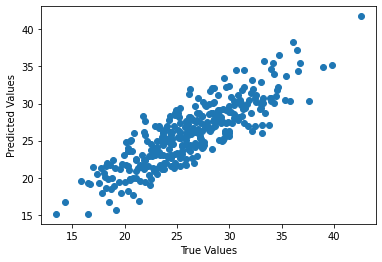

In [268]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [74]:
for column in ["feature_5", "feature_6"]:
    noise = np.random.normal(0, 1, len(dataset2))  # Generate Gaussian noise
    data[column + '_noisy'] = data[column] + noise  # Add

In [75]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,y,feature_5_noisy,feature_6_noisy
0,-1.039906,0.612774,-1.053416,-0.623769,1.914031,3.0,4.0,6.0,4.0,1.0,-24.880512,4.195221,4.778911
1,0.317453,-0.332860,-0.093387,-0.529332,-1.514470,12.0,4.0,0.0,2.0,2.0,-57.915143,12.478202,3.908742
2,0.538910,-1.037246,-0.190339,-0.875618,-1.382800,10.0,3.0,0.0,11.0,0.0,-78.689966,9.937891,1.891753
3,-1.776246,-0.080600,-0.833056,0.915390,-0.549540,7.0,1.0,7.0,6.0,5.0,-57.187044,8.228839,2.594082
4,-0.223466,-0.349317,-0.019420,-0.303180,0.799942,12.0,7.0,3.0,10.0,10.0,-0.172766,12.689405,6.607478
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.758929,0.281191,0.104201,-0.062593,-0.753965,11.0,7.0,1.0,0.0,2.0,2.459681,9.656573,8.312915
996,0.027313,-0.047371,-1.582177,-0.940399,-0.560761,13.0,0.0,0.0,6.0,2.0,-114.131516,13.972091,-0.076445
997,0.965397,1.236131,0.088658,0.197316,-0.617652,6.0,4.0,6.0,8.0,0.0,34.168651,7.303433,3.244616
998,0.648710,-0.167118,0.146714,1.206509,-0.816936,9.0,5.0,4.0,2.0,6.0,28.822587,8.639969,3.557784


In [95]:
grouping_columns = ["feature_5", "feature_6", "feature_7", "feature_8", "feature_9"]  # Replace with your actual grouping column names

for column in grouping_columns:
    categories = data[column].unique()  # Get unique categories in the column
    num_categories = len(categories)
    noise = np.random.randint(-1, 2, len(data))  # Generate random integers (-1, 0, 1) as noise
    perturbed_categories = (data[column].astype(int) + noise) % num_categories  # Perturb the categories
    data[column + '_noisy'] = pd.Categorical.from_codes(perturbed_categories, categories)  # Create a new categorical column


In [96]:
data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,y,feature_5_noisy,feature_6_noisy,feature_7_noisy,feature_8_noisy,feature_9_noisy
0,-1.039906,0.612774,-1.053416,-0.623769,1.914031,3.0,4.0,6.0,4.0,1.0,-24.880512,4.0,0.0,5.0,9.0,2.0
1,0.317453,-0.332860,-0.093387,-0.529332,-1.514470,12.0,4.0,0.0,2.0,2.0,-57.915143,0.0,7.0,5.0,2.0,0.0
2,0.538910,-1.037246,-0.190339,-0.875618,-1.382800,10.0,3.0,0.0,11.0,0.0,-78.689966,13.0,1.0,6.0,3.0,1.0
3,-1.776246,-0.080600,-0.833056,0.915390,-0.549540,7.0,1.0,7.0,6.0,5.0,-57.187044,2.0,4.0,6.0,8.0,6.0
4,-0.223466,-0.349317,-0.019420,-0.303180,0.799942,12.0,7.0,3.0,10.0,10.0,-0.172766,8.0,4.0,7.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.758929,0.281191,0.104201,-0.062593,-0.753965,11.0,7.0,1.0,0.0,2.0,2.459681,13.0,6.0,7.0,2.0,2.0
996,0.027313,-0.047371,-1.582177,-0.940399,-0.560761,13.0,0.0,0.0,6.0,2.0,-114.131516,8.0,4.0,0.0,8.0,2.0
997,0.965397,1.236131,0.088658,0.197316,-0.617652,6.0,4.0,6.0,8.0,0.0,34.168651,2.0,0.0,5.0,1.0,11.0
998,0.648710,-0.167118,0.146714,1.206509,-0.816936,9.0,5.0,4.0,2.0,6.0,28.822587,5.0,0.0,1.0,2.0,6.0


In [78]:
data.feature_5.value_counts()

11.0    92
0.0     89
2.0     80
4.0     79
9.0     77
6.0     72
13.0    72
12.0    69
8.0     67
3.0     64
7.0     64
5.0     63
1.0     61
10.0    51
Name: feature_5, dtype: int64

In [79]:
data.feature_5_noisy.value_counts()

13.0    85
12.0    81
0.0     81
8.0     80
1.0     76
6.0     74
7.0     70
5.0     70
2.0     68
10.0    67
4.0     66
9.0     64
3.0     60
11.0    58
Name: feature_5_noisy, dtype: int64